In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats
import seaborn as sns

In [2]:
emissions = "emissions.csv"
emissions_df = pd.read_csv(emissions)
emissions_df = emissions_df.drop(['Unnamed: 0'], axis =1)
emissions_df = emissions_df.drop(['index'], axis =1)
emissions_df = emissions_df.rename(columns={'COUNTY': 'County'})

emissions_df

,County,EMISSIONS
0,ANOKA,6898.924168
1,CARVER,1969.142627
2,DAKOTA,16509.882878
3,HENNEPIN,26016.136503
4,RAMSEY,10796.446714
5,SCOTT,3502.666799
6,WASHINGTON,7082.007676


In [3]:
life_path = 'life.csv'
life_df = pd.read_csv(life_path)
life_df = life_df.drop(['Unnamed: 0'], axis =1)
life_df['County'] = life_df['County'].str.replace("County, MN", "", case = False)
life_df["County"] = life_df["County"].str.upper()
life_df

,County,Life Expectancy
0,ANOKA,80.140260
1,CARVER,82.370588
2,DAKOTA,80.683333
3,HENNEPIN,80.320438
4,RAMSEY,79.533846
5,SCOTT,80.809524
6,WASHINGTON,81.847917


In [4]:
hospitals = 'hospital.csv'
hospitals_df = pd.read_csv(hospitals)
hospitals_df = hospitals_df.drop(['Unnamed: 0'], axis =1)
hospitals_df = hospitals_df.drop(['index'], axis =1)
hospitals_df = hospitals_df.rename(columns={'COUNTY': 'County'})
hospitals_df

,County,Number of Hospitals
0,ANOKA,1
1,CARVER,1
2,DAKOTA,2
3,HENNEPIN,8
4,RAMSEY,3
5,SCOTT,2
6,WASHINGTON,1


In [5]:
income = 'Pop_Income_AH/income.csv'
income_df = pd.read_csv(income)
income_df = income_df.drop(['Unnamed: 0'], axis =1)
income_df["County"] = income_df["County"].str.upper()
income_df

,County,Converted_Income (thousands),Life Expectancy
0,ANOKA,68.68417,80.140260
1,CARVER,86.90483,82.370588
2,DAKOTA,73.16733,80.683333
3,HENNEPIN,63.38100,80.320438
4,RAMSEY,54.05200,79.533846
5,SCOTT,86.04733,80.809524
6,WASHINGTON,81.46683,81.847917


In [6]:
population = 'Pop_Income_AH/population.csv'
population_df = pd.read_csv(population)
population_df = population_df.drop(['Unnamed: 0'], axis =1)
population_df["County"] = population_df["County"].str.upper()
population_df

,County,Life Expectancy,Population Density
0,ANOKA,80.140260,758.33
1,CARVER,82.370588,251.17
2,DAKOTA,80.683333,692.17
3,HENNEPIN,80.320438,1955.33
4,RAMSEY,79.533846,3063.50
5,SCOTT,80.809524,367.00
6,WASHINGTON,81.847917,578.67


In [7]:
unemployment = 'Education_Unemployment_JD/unemployment.csv'
unemployment_df = pd.read_csv(unemployment)
unemployment_df = unemployment_df.rename(columns={'Unnamed: 0': 'County'})
unemployment_df['County'] = unemployment_df['County'].str.replace("County", "", case = False)
unemployment_df = unemployment_df.rename(columns={'0': 'Unemployment %'})
unemployment_df["County"] = income_df["County"].str.upper()
unemployment_df


,County,Unemployment %
0,ANOKA,4.68
1,CARVER,5.00
2,DAKOTA,4.98
3,HENNEPIN,5.37
4,RAMSEY,4.80
5,SCOTT,5.57
6,WASHINGTON,4.80


In [8]:
education = 'Education_Unemployment_JD/education.csv'
education_df = pd.read_csv(education)
education_df = education_df.drop(['Unnamed: 0'], axis =1)
education_df = education_df.rename(columns={'Counties': 'County'})
education_df["County"] = education_df["County"].str.upper()
education_df

,County,Life Expectancy,Education level as a weighted average
0,ANOKA,80.14,329.09
1,CARVER,82.37,379.54
2,DAKOTA,80.68,367.28
3,HENNEPIN,80.32,380.62
4,RAMSEY,79.53,357.70
5,SCOTT,80.81,361.11
6,WASHINGTON,81.85,374.17


In [9]:
merged_df1 = emissions_df.merge(life_df, left_index=True, right_index=True)
merged_df1 = merged_df1.drop(['County_y'], axis =1)
merged_df2 = merged_df1.merge(hospitals_df, left_index=True, right_index=True)
merged_df2 = merged_df2.drop(['County'], axis =1)
merged_df3 = merged_df2.merge(income_df, left_index=True, right_index=True)
merged_df3 = merged_df3.drop(['County', 'Life Expectancy_y'], axis =1)
merged_df4 = merged_df3.merge(population_df, left_index=True, right_index=True)
merged_df4 = merged_df4.drop(['County', 'Life Expectancy_x'], axis =1)
merged_df5 = merged_df4.merge(unemployment_df, left_index=True, right_index=True)
merged_df5 = merged_df5.drop(['County'], axis =1)
combined_df = merged_df5.merge(education_df, left_index=True, right_index=True)
combined_df = combined_df.drop(['County', 'Life Expectancy_y'], axis =1)
combined_df = combined_df.rename(columns={'Converted_Income (thousands)': 'Income', 'Education level as a weighted average': 'Education Level', 'County_x':'County','EMISSIONS': 'Nitrogen Oxide Emissions', 'Life Expectancy_x': 'Life Expectancy'})
combined_df = combined_df.set_index(['County'])
combined_df

,Nitrogen Oxide Emissions,Number of Hospitals,Income,Life Expectancy,Population Density,Unemployment %,Education Level
County,,,,,,,
ANOKA,6898.924168,1,68.68417,80.140260,758.33,4.68,329.09
CARVER,1969.142627,1,86.90483,82.370588,251.17,5.00,379.54
DAKOTA,16509.882878,2,73.16733,80.683333,692.17,4.98,367.28
HENNEPIN,26016.136503,8,63.38100,80.320438,1955.33,5.37,380.62
RAMSEY,10796.446714,3,54.05200,79.533846,3063.50,4.80,357.70
SCOTT,3502.666799,2,86.04733,80.809524,367.00,5.57,361.11
WASHINGTON,7082.007676,1,81.46683,81.847917,578.67,4.80,374.17


<Figure size 432x288 with 0 Axes>

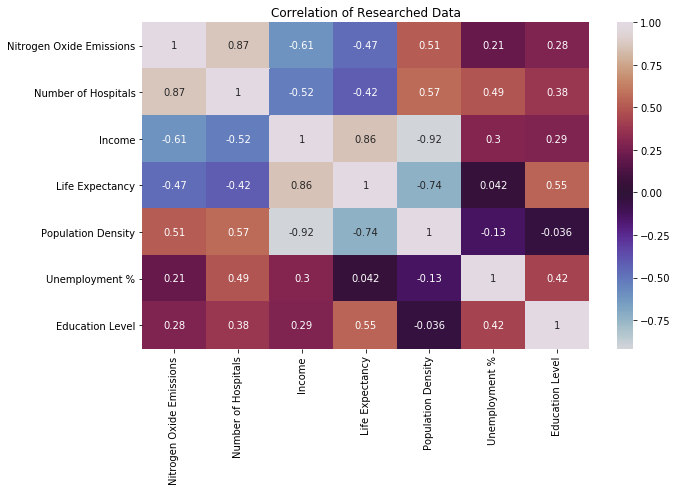

In [10]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(combined_df.corr(), center=0, cmap="twilight", annot=True)
ax.set_title('Correlation of Researched Data')
fig.savefig('correlation.png')

In [11]:
combined_df['Nitrogen Oxide Emissions'] = combined_df['Nitrogen Oxide Emissions'].rank()
combined_df['Number of Hospitals'] = combined_df['Number of Hospitals'].rank(ascending=False)
combined_df['Income'] = combined_df['Income'].rank(ascending=False)
combined_df['Life Expectancy'] = combined_df['Life Expectancy'].rank(ascending=False)
combined_df['Population Density'] = combined_df['Population Density'].rank(ascending=True)
combined_df['Unemployment %'] = combined_df['Unemployment %'].rank()
combined_df['Education Level'] = combined_df['Education Level'].rank(ascending=False)
combined_df

,Nitrogen Oxide Emissions,Number of Hospitals,Income,Life Expectancy,Population Density,Unemployment %,Education Level
County,,,,,,,
ANOKA,3.0,6.0,5.0,6.0,5.0,1.0,7.0
CARVER,1.0,6.0,1.0,1.0,1.0,5.0,2.0
DAKOTA,6.0,3.5,4.0,4.0,4.0,4.0,4.0
HENNEPIN,7.0,1.0,6.0,5.0,6.0,6.0,1.0
RAMSEY,5.0,2.0,7.0,7.0,7.0,2.5,6.0
SCOTT,2.0,3.5,2.0,3.0,2.0,7.0,5.0
WASHINGTON,4.0,6.0,3.0,2.0,3.0,2.5,3.0


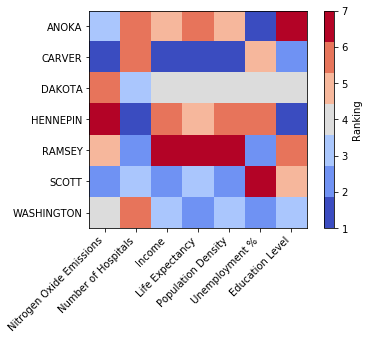

In [12]:
fig1 = plt.gcf()
plt.imshow(combined_df, cmap=plt.cm.get_cmap('coolwarm', 7))
plt.colorbar(ticks=range(8), label='Ranking')
plt.xticks(range(len(combined_df)),combined_df.columns, rotation=45, horizontalalignment='right')
plt.yticks(range(len(combined_df)),combined_df.index)
plt.show()
ax.set_title('County Rankings')
fig1.savefig('countyranking.png')